# DISCLAIMER


This project is a fork of [Fakenews-dictation-using-ml](https://github.com/ffdrko/Fakenews-dictation-using-ml) by [Fahim Faisal Deepto](https://github.com/ffdrko). 

Intended for educational / code review purpose.

[COLAB](https://colab.research.google.com/drive/1MfrS-kKC4vbpXYHjJzATdR7DiK_j8OHK)

# PROBLEM STATEMENT
> why this project

## METHODOLOGY
- >data description
- Analysis is performed using `OSEMiN` process for data science proposed by Hilary Mason and Chris Wiggins. [Example Use](https://www.amazon.com/Data-Science-Command-Line-Time-Tested/dp/1491947853/ref=as_li_ss_tl?dchild=1&keywords=Data+Science+at+the+Command+Line:+Facing+the+Future+with+Time-Tested+Tools&qid=1597462926&sr=8-1&linkCode=sl1&tag=inspiredalgor-20&linkId=9ea43154daea4989fd14f42f79189084&language=en_US)

## PROPOSED SOLUTION
> how this is working

# IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


# OBTAIN


TODO:
- point to data sources

In [2]:
fake = pd.read_csv("https://raw.githubusercontent.com/ffdrko/Fakenews-dictation-using-ml/main/Dataset/Fake.csv")
true = pd.read_csv("https://raw.githubusercontent.com/ffdrko/Fakenews-dictation-using-ml/main/Dataset/True.csv")

print(f"""fake dataset dimension: {fake.shape}, true dataset dimension: {true.shape}""")

fake dataset dimension: (23481, 4), true dataset dimension: (21417, 4)


In [3]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

# Concatenate
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [6]:
data.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [7]:
# Shuffle the data
from sklearn.utils import shuffle

data = shuffle(data)
data = data.reset_index(drop=True)


In [8]:
# Check the data
data.head()

,title,text,subject,date,target
0,THEIR EVIL KNOWS NO BOUNDS: TALIBAN EXECUTES 5...,The Taliban or ISIS? Does it really matter? Ra...,Government News,"Apr 13, 2015",fake
1,Bill Maher Explains Socialism To Republicans ...,"Until recently, socialism has been one of th...",News,"June 4, 2016",fake
2,U.S. policy changes on Cuba will be tough to u...,WASHINGTON (Reuters) - It will be difficult fo...,politicsNews,"October 14, 2016",true
3,LIFE IN THE MILITARY ACADEMY: Where Donald J. ...,Many on the left and in the liberal media are ...,left-news,"Aug 6, 2017",fake
4,DESPERATE PROGRESSIVES ARE LOSING IN GERMANY: ...,The rampant migrant rape and violence is shini...,left-news,"Feb 11, 2016",fake


In [9]:
# Removing the date and title (not used for the analysis)
data.drop(columns=["date", 'title'], inplace=True)
data.head()

,text,subject,target
0,The Taliban or ISIS? Does it really matter? Ra...,Government News,fake
1,"Until recently, socialism has been one of th...",News,fake
2,WASHINGTON (Reuters) - It will be difficult fo...,politicsNews,true
3,Many on the left and in the liberal media are ...,left-news,fake
4,The rampant migrant rape and violence is shini...,left-news,fake


In [10]:
data.head()

,text,subject,target
0,The Taliban or ISIS? Does it really matter? Ra...,Government News,fake
1,"Until recently, socialism has been one of th...",News,fake
2,WASHINGTON (Reuters) - It will be difficult fo...,politicsNews,true
3,Many on the left and in the liberal media are ...,left-news,fake
4,The rampant migrant rape and violence is shini...,left-news,fake



# SCRUB


## Convert to lowercase


In [11]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,hillary clinton told us she was dead broke b...,politics,fake
1,something is definitely incredibly suspicious ...,News,fake
2,fox news host sean hannity is having a twitter...,News,fake
3,new york (reuters) - presumptive republican pr...,politicsNews,true
4,barack obama s white college girlfriend sheila...,left-news,fake



## Remove punctuation


In [12]:
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

# Check
data.head()

,text,subject,target
0,hillary clinton told us she was dead broke b...,politics,fake
1,something is definitely incredibly suspicious ...,News,fake
2,fox news host sean hannity is having a twitter...,News,fake
3,new york reuters presumptive republican presi...,politicsNews,true
4,barack obama s white college girlfriend sheila...,left-news,fake


## Removing stopwords


In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tamji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

data.head()

,text,subject,target
0,hillary clinton told us dead broke seems 250 t...,politics,fake
1,something definitely incredibly suspicious rec...,News,fake
2,fox news host sean hannity twitter meltdown ti...,News,fake
3,new york reuters presumptive republican presid...,politicsNews,true
4,barack obama white college girlfriend sheila m...,left-news,fake


# EXPLORATION

## How many articles per subject?


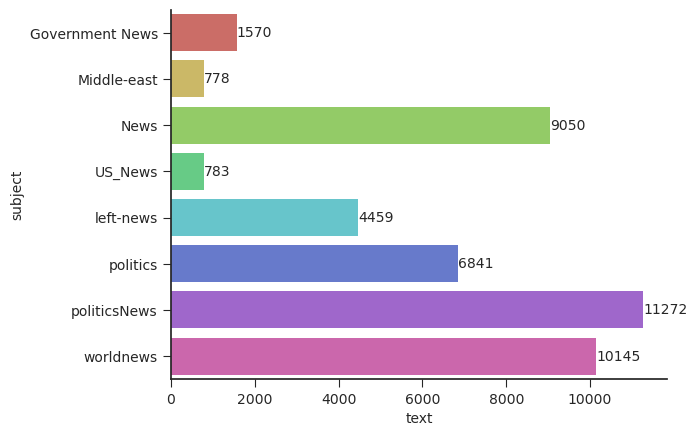

In [15]:
with plt.style.context('seaborn-v0_8-ticks'):
    ax = sns.barplot(x='text', 
                     y='subject', 
                     data=pd.DataFrame(
                         data.groupby(['subject'])['text'].count().reset_index()), 
                     palette='hls')
    ax.bar_label(ax.containers[0], fmt='%.f', label_type='edge', padding=-0)
sns.despine()
plt.show()

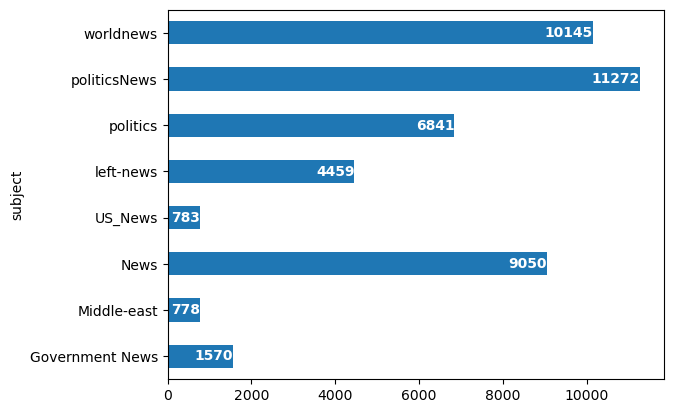

In [16]:
data.groupby(['subject'])['text'].count().plot(kind="barh")
for y, x in enumerate(data.groupby(['subject'])['text'].count().to_list()):
    plt.annotate(str(np.around(x, decimals=3)), xy=(x-0.01, y),
                 va='center', ha='right', color='w', fontweight='bold')
plt.legend([], frameon=False)
plt.show()


## How many fake and real articles?


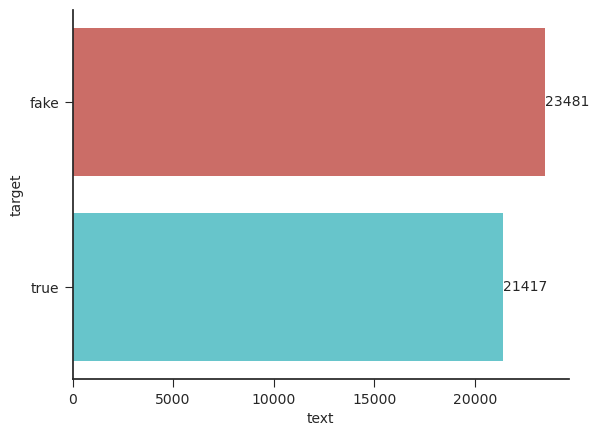

In [17]:
with plt.style.context('seaborn-v0_8-ticks'):
    ax = sns.barplot(x='text', 
                     y='target', 
                     data=pd.DataFrame(
                         data.groupby(['target'])['text'].count().reset_index()), 
                     palette='hls')
    ax.bar_label(ax.containers[0], fmt='%.f', label_type='edge', padding=-0)
sns.despine()
plt.show()

## Word cloud for fake news


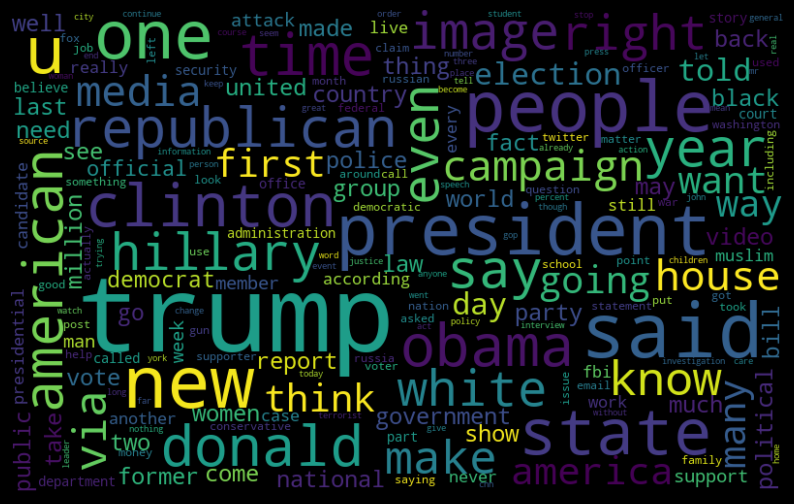

In [120]:
from wordcloud import WordCloud

with plt.style.context('dark_background'):
    fake_data = data[data["target"] == "fake"]
    all_words = ' '.join([text for text in fake_data.text])

    wordcloud = WordCloud(width= 800, 
                          height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

## Most frequent words counter 

(Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   


In [18]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

In [19]:
def counter(text, column_text, quantity, title='Most frequent words in fake news', figsize=(12, 8)):
    """_summary_

    Args:
        text (_type_): _description_
        column_text (_type_): _description_
        quantity (_type_): _description_
        title (str, optional): _description_. Defaults to 'Most frequent words in fake news'.
        figsize (tuple, optional): _description_. Defaults to (12, 8).
    """
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                 "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns="Frequency", n=quantity)
    plt.figure(figsize=figsize)
    ax = sns.barplot(data=df_frequency, x="Word", y="Frequency", palette='hls')
    ax.bar_label(ax.containers[0], fmt='%.f',
                 label_type='edge', padding=-0, fontsize=10)
    ax.set(ylabel="Count")
    plt.title(title, fontsize=16)
    plt.xticks(rotation='vertical')
    plt.show()



## Most frequent words in fake news


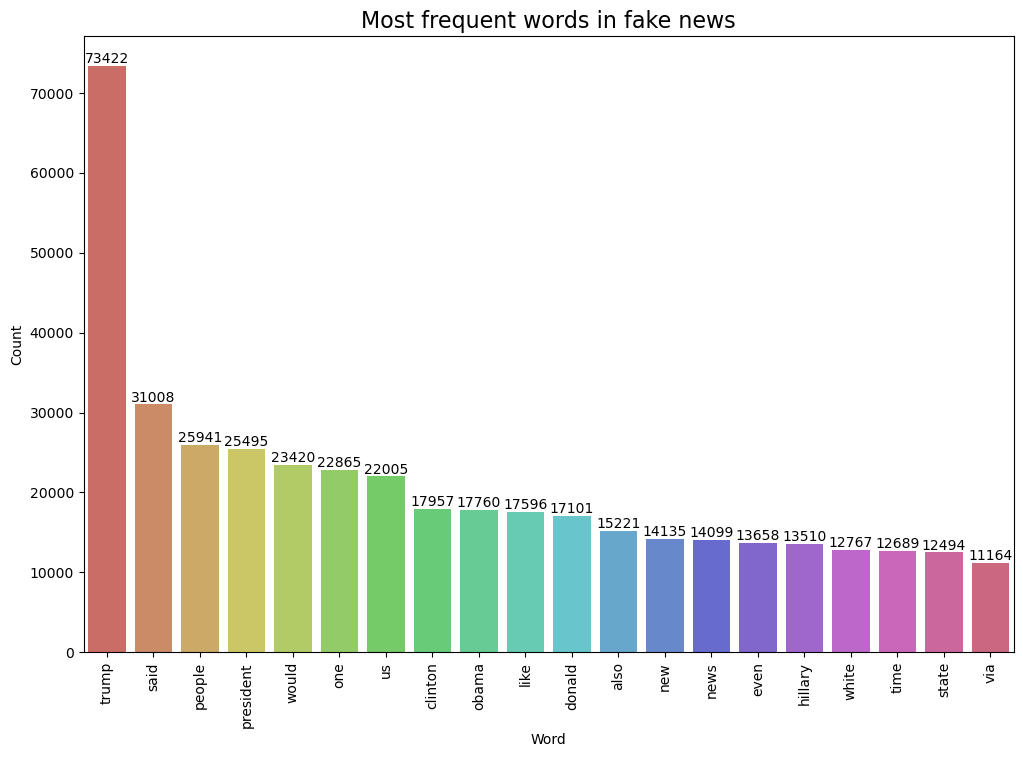

In [20]:
counter(data[data["target"] == "fake"], "text", 20)


# MODEL

## Pre Processing

In [106]:
def model_report(model,
                 X_train,
                 y_train,
                 X_test,
                 y_test,
                 cmap=['Reds','Greens'],
                 normalize='true',
                 figsize=(16, 6), 
                 show_train_report=False,
                 unfitted_model=True):
    """
    Report of model performance using train-test split dataset.
    Shows train and test score, Confusion Matrix and, ROC Curve of performance of test data.
    
    Intended to work ONLY on model where target has properly encoded binomial class value.
    
    Parameters:
    ===========
    model     = object, scikit-learn model object; no default.
    X_train   = pandas.DataFrame, predictor variable training data split; no default,
    y_train   = pandas.DataFrame, target variable training data split; no default,
    X_test    = pandas.DataFrame, predictor variable test data split; no default,
    y_test    = pandas.DataFrame, target variable test data split; no default,
    cmap      = list of str, colormap of Confusion Matrix; default: ['Reds','Greens'],
                cmap of train and test data
    normalize = str, normalize count of Confusion Matrix; default: 'true',
                - `true` to normalize counts.
                - `false` to show raw counts.
    figsize   = tuple ``(length, height)``, figsize of output; default: (16, 6),
    show_train_report = boolean; default: False,
                - True, to show report.
                - False, to turn off report.
    unfitted_model = bool; default: True,
                - if True, fits model to train data and generates report.
                - if False, does not fits model and generates report.
                Use False for previously fitted model.

    ---version 0.10.0---
    
    # TODO:
    - return dict for measuring performance of model with other. should be save and used later.
        - this output dict will be a optional parameter.
    - ROC curve label fix
    """
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    
    from IPython.display import display, HTML
    from sklearn import metrics
    
    def str_model_(model):
        """Helper function to get model class display statement"""
        str_model = str(model.__class__).split('.')[-1][:-2]
        
        def _return_model_name(x):
            steps = x.steps
            li = []
            for item in steps:
                if item[0].lower()=='model':
                    li.append(str(item[1].__class__).split('.')[-1].split("'")[0])
                else:
                    li.append('Could not be inferred.')
            return list(set(li))[0]
                
        if str_model=='Pipeline':
            print('Pipeline detected. Trying to infer Model type.')
            name = _return_model_name(model)
            # print(name)
            if name=='Could not be inferred.':
                str_model = 'Unknown'
            else:
                str_model = name
        display(
            HTML(
                f"""<strong>Report of {str_model} type model using train-test split dataset.</strong>"""
            ))

    str_model_(model)
    X_train = X_train.copy()
    y_train = y_train.copy()
    if unfitted_model:
        model.fit(X_train, y_train)
    print(f"{'*'*90}")
    train = model.score(X_train, y_train)
    test = model.score(X_test, y_test)
    print(f"""Train accuracy score: {train.round(4)}""")
    print(f"""Test accuracy score: {test.round(4)}""")
    if abs(train - test) <= .05:
        print(
            f"    No over or underfitting detected, difference of scores did not cross 5% thresh hold."
        )
    elif (train - test) > .05:
        print(
            f"    Possible Overfitting, difference of scores {round(abs(train-test)*100,2)}% crossed 5% thresh hold."
        )
    elif (train - test) < -.05:
        print(
            f"    Possible Underfitting, difference of scores {round(abs(train-test)*100,2)}% crossed 5% thresh hold."
        )
    print(f"{'*'*90}")
    print("")
    print(f"{'*'*60}")
    
    if show_train_report:
        print(f"""Classification report on train data of:
        {model}""")
        print(f"{'-'*60}")
        print(metrics.classification_report(y_train, model.predict(X_train)))
        print(f"{'*'*60}")
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=figsize)
        metrics.plot_confusion_matrix(model,
                                      X_train,
                                      y_train,
                                      cmap=cmap[0],
                                      normalize=normalize,
                                      ax=ax[0])
        ax[0].title.set_text('Confusion Matrix')
        metrics.plot_roc_curve(model,
                               X_train,
                               y_train,
                               color='gold',
                               ax=ax[1])
        ax[1].plot([0, 1], [0, 1], ls='-.', color='red')
        ax[1].grid()
        ax[1].title.set_text('ROC Curve')

        plt.tight_layout()
        plt.show()
        print(f"{'='*170}")
        print(f"{'*'*60}")
    
    print(f"""Classification report on test data of:
    {model}""")
    print(f"{'-'*60}")
    print(metrics.classification_report(y_test, model.predict(X_test)))
    print(f"{'*'*60}")

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    metrics.plot_confusion_matrix(model,
                                  X_test,
                                  y_test,
                                  cmap=cmap[1],
                                  normalize=normalize,
                                  ax=ax[0])
    ax[0].title.set_text('Confusion Matrix')
    metrics.plot_roc_curve(model,
                           X_test,
                           y_test,
                           color='gold',
                           ax=ax[1])
    ax[1].plot([0, 1], [0, 1], ls='-.', color='red')
    ax[1].grid()
    ax[1].title.set_text('ROC Curve')

    plt.tight_layout()
    plt.show()

## Split the data


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    data['text'], data.target, test_size=0.2, random_state=42)

## Logistic regression


In [28]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe_lr = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

In [29]:
pipe_lr

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', LogisticRegression())])

Pipeline detected. Trying to infer Model type.
LogisticRegression


******************************************************************************************
Train accuracy score: 0.9932
Test accuracy score: 0.9904
    No over or underfitting detected, difference of scores did not cross 5% thresh hold.
******************************************************************************************

************************************************************
Classification report on train data of:
        Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', LogisticRegression())])
------------------------------------------------------------
              precision    recall  f1-score   support

        fake       0.99      0.99      0.99     18801
        true       0.99      0.99      0.99     17117

    accuracy                           0.99     35918
   macro avg       0.99      0.99      0.99     35918
weighted avg       0.99      0.99      0.99     35918

************************************************

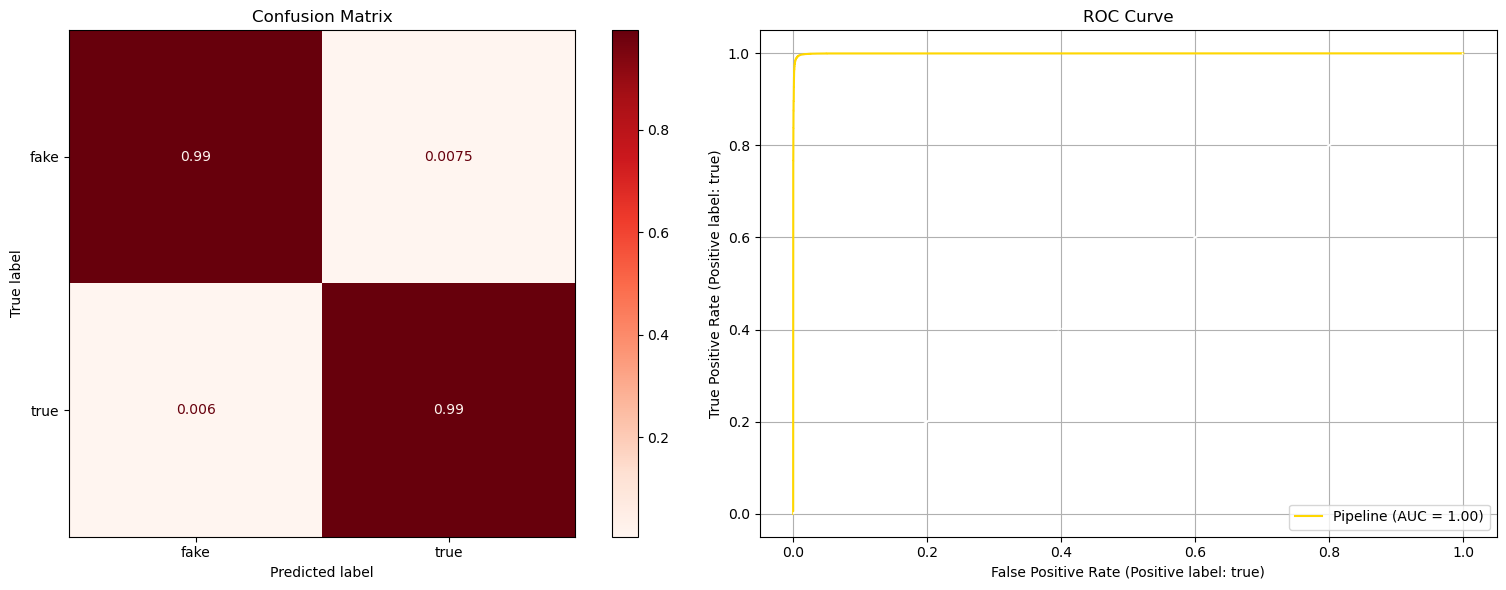

************************************************************
Classification report on test data of:
    Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', LogisticRegression())])
------------------------------------------------------------
              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4680
        true       0.99      0.99      0.99      4300

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

************************************************************


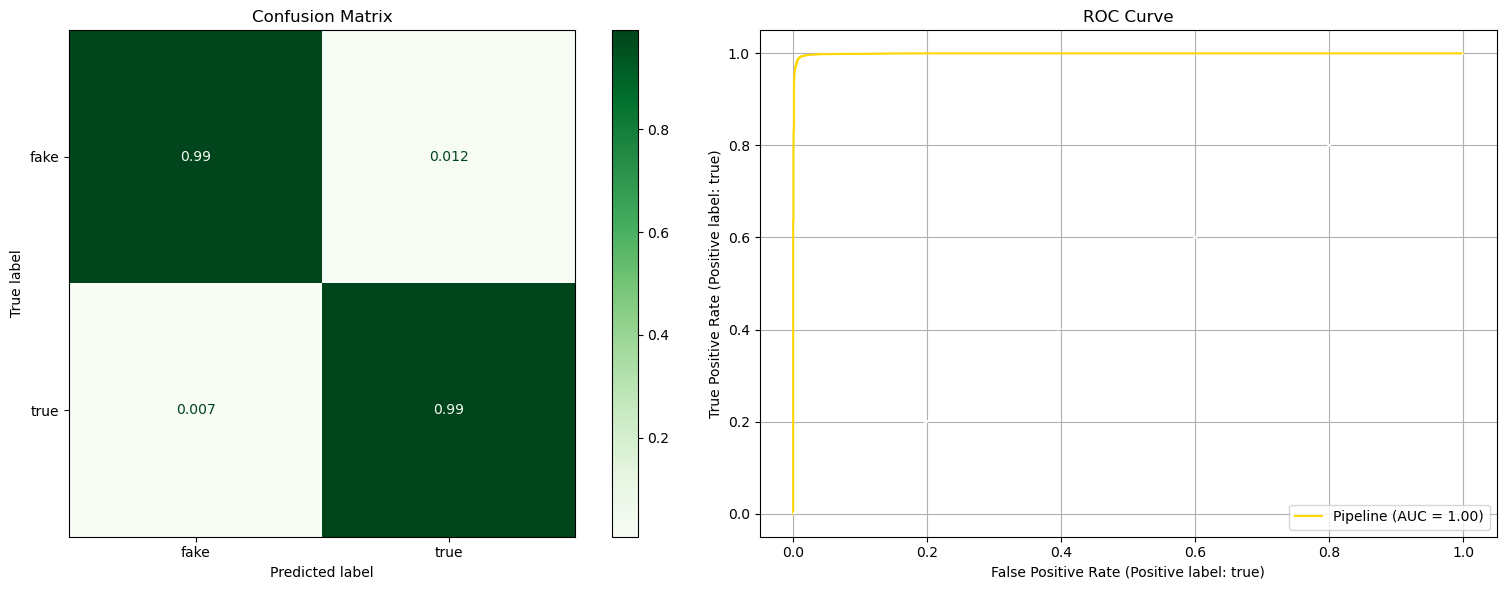

In [96]:
model_report(pipe_lr,
             X_train,
             y_train,
             X_test,
             y_test,
             cmap=['Reds', 'Greens'],
             normalize='true',
             figsize=(16, 6),
             show_train_report=True,
             unfitted_model=True)


## Random Forest


In [104]:
from sklearn.ensemble import RandomForestClassifier

pipe_rf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])
pipe_rf


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model',
                 RandomForestClassifier(criterion='entropy', n_estimators=50))])

Pipeline detected. Trying to infer Model type.
RandomForestClassifier


******************************************************************************************
Train accuracy score: 1.0
Test accuracy score: 0.9919
    No over or underfitting detected, difference of scores did not cross 5% thresh hold.
******************************************************************************************

************************************************************
Classification report on test data of:
    Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model',
                 RandomForestClassifier(criterion='entropy', n_estimators=50))])
------------------------------------------------------------
              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4680
        true       0.99      0.99      0.99      4300

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


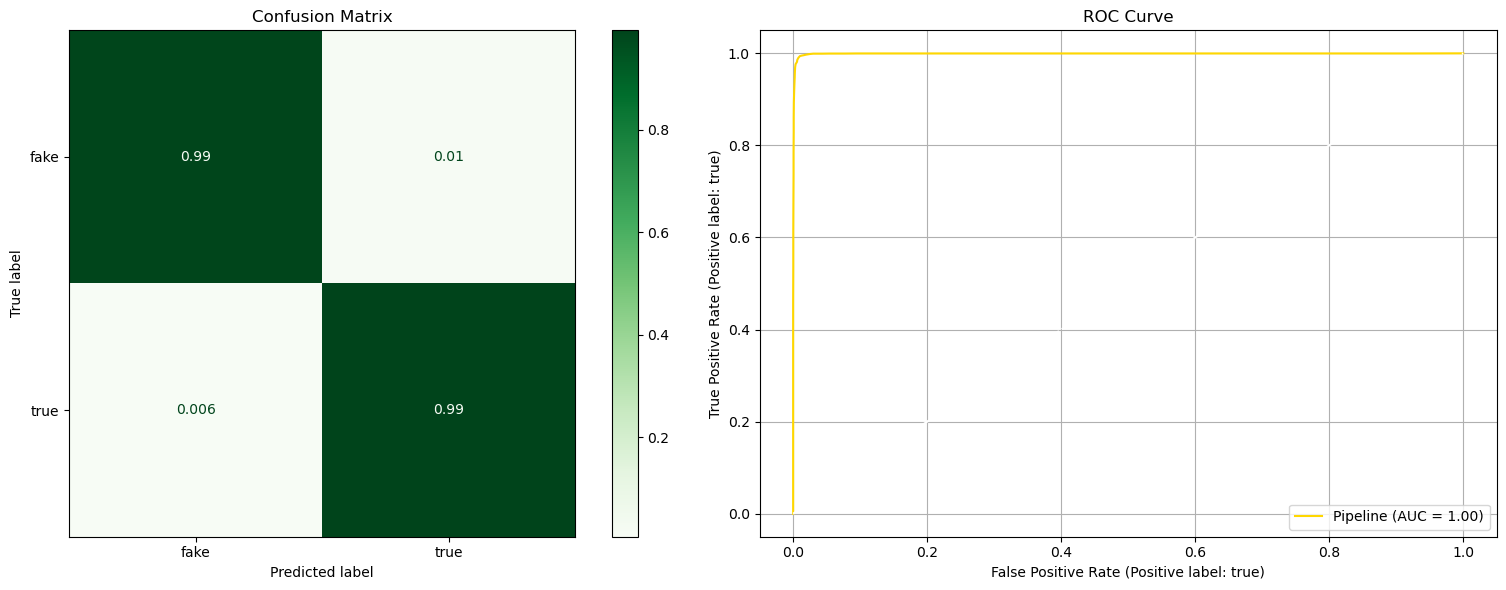

In [105]:
model_report(pipe_rf,
             X_train,
             y_train,
             X_test,
             y_test,
             cmap=['Reds', 'Greens'],
             normalize='true',
             figsize=(16, 6),
             show_train_report=False,
             unfitted_model=True)


## Support Vector Machine


In [107]:
from sklearn import svm

clf = svm.SVC(kernel='linear')  # Linear Kernel

pipe_svm = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('model', clf)])
pipe_svm


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', SVC(kernel='linear'))])

In [1]:
model_report(pipe_svm,
             X_train,
             y_train,
             X_test,
             y_test,
             cmap=['Reds', 'Greens'],
             normalize='true',
             figsize=(16, 6),
             show_train_report=False,
             unfitted_model=True)


# INTERPRET

# MODEL SELECTION

In [11]:
# naive way for model selection

# plt.figure(figsize=(8,7))
# plt.bar(list(dct.keys()),list(dct.values()))
# plt.ylim(90,100)
# plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))
# plt.show()

# TODO:

- annotate visuals
- polish docstring
- detailed model report
    - confusion matrix 
    - ROC/AUC
- add model selection and interpretation
    - grid search
- use case and recommendation?!
- ensure reproducibility
    - env file
    - requirements file